In [7]:

using Latexify
using AbstractAlgebra
using GLMakie

In [8]:
include("mdulos/liner_utils.jl")
using .linearUtils

In [9]:
Makie.inline!(true)

true

# POPULATION DYNAMICS:

FOXES AND RABBITS

In [10]:
RR = RealField;
RRs, (A, F, R, P, p, I, W, λ) = polynomial_ring(RR, [:A, :F, :R, :P, :p, :I, :W, :λ])

(Multivariate polynomial ring in 8 variables over floats, AbstractAlgebra.Generic.MPoly{BigFloat}[A, F, R, P, p, I, W, λ])

In [ ]:
̄v

In [17]:
Rs, v = polynomial_ring(RRs, :v => (1:2))
RRf, w = polynomial_ring(Rs, :w => (1:2))

(Multivariate polynomial ring in 2 variables over Rs, AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}[w[1], w[2]])

## Recalling the Population Dynamics Model


$ F = 0.6F + 0.5 R $

In [12]:
F ~ 0.6F + 0.5R

F ~ 0.59999999999999997779553950749686919152736663818359375*F + 0.5*R

$ R = -pF + 1.2R $

In [13]:
R ~ -p*F + 1.2*R

R ~ -1.0*F*p + 1.1999999999999999555910790149937383830547332763671875*R

Once again we express this equations as a Matrix system of linear equation using an argumented matrix.

In [32]:
[F; R] ~ RRf[0.6 0.5; -p 1.2]*RRf[F; R]

AbstractAlgebra.Generic.MPoly{BigFloat}[F, R] ~ [0.59999999999999997779553950749686919152736663818359375*F+0.5*R; -1.0*F*p+1.1999999999999999555910790149937383830547332763671875*R]

Lets then see how the populations changes when t times or k has passed.

Case p = 0.175, 0.16 and 0.10:

$$
\begin{matrix}
0.6 - λ && 0.5 \\[0.3em]
 -0.175 && 1.2 - λ
\end{matrix} \longleftarrow A - λI.
$$

In [34]:
RRf[0.6 - λ 0.5; -0.175 1.2 - λ] ~ A .- λ*I

[-1.0*λ+0.59999999999999997779553950749686919152736663818359375 0.5; -0.174999999999999988897769753748434595763683319091796875 -1.0*λ+1.1999999999999999555910790149937383830547332763671875] ~ A - 1.0*I*λ

Lets find the charateristics polynomial:

$λ^2 - 1.8λ + 0.8075$

In [45]:
det(RRf[0.6 - λ 0.5; -0.175 1.2 - λ])

λ^2 - 1.79999999999999993338661852249060757458209991455078125*λ + 0.8074999999999999411581796948667043436236531174512802021607066034827870915080439

this will give us then λ = 0.95 and 0.85

In [200]:
Qformular(a, b, c) = (-b + sqrt(b^2 - 4 * a * c)) / 2 * a;
Qformular(a, b, c, sign) = (-b - sqrt(b^2 - 4 * a * c)) / 2 * a;

In [202]:
Qformular(1, 1.7999, 0.8074)

-0.8498500748503554

In [203]:
Qformular(1, 1.7999, 0.8074, -1)

-0.9500499251496447

In [215]:
λ = 0.85

0.85

In [274]:
p = 0.175

0.175

In [352]:
A = [0.6 - λ 0.5; -0.175 1.2 - λ]

2×2 Matrix{Float64}:
 -0.35   0.5
 -0.175  0.25

In [353]:
I = RRf[1 0 ; 0 1]

[1   0]
[0   1]

In [371]:
a = (A .- λ * I)

ErrorException: Broadcasting for type Matrix{Float64} not implemented

In [355]:
λ = 0.95

0.95

In [356]:
b = (A .- λ * I)

ErrorException: Broadcasting for type Matrix{Float64} not implemented

In [393]:
calc_eingen_vectors(p) = [0.6 - λ 0.5; -p 1.2 - λ]

calc_eingen_vectors (generic function with 1 method)

In [503]:
calc_eingen_vectors(0.20)

2×2 Matrix{Float64}:
 -0.25  0.5
 -0.2   0.35

In [385]:
population_model(M, λ) = [M[:1, :1] - λ; M[:2, :2] - λ]

population_model (generic function with 1 method)

In [386]:
population_model(A, 0.95)

2-element Vector{Float64}:
 -1.2999999999999998
 -0.7

In [387]:
population_model(a, 0.85)

2-element Vector{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}:
 -1.09999999999999997779553950749686919152736663818359375
 -0.5

In [510]:
population_model(calc_eingen_vectors(0.16), 1)

2-element Vector{Float64}:
 -1.25
 -0.65

In [389]:
population_model(A, .85)

2-element Vector{Float64}:
 -1.2
 -0.6

In [464]:
gen_population_data(range::UnitRange, p, λ=λ) = map(x -> population_model(calc_eingen_vectors(p), λ), range)

gen_population_data (generic function with 5 methods)

In [465]:
gen_population_data(1:100, p)

100-element Vector{Vector{Float64}}:
 [-1.25, -0.65]
 [-2.25, -1.65]
 [-3.25, -2.65]
 [-4.25, -3.65]
 [-5.25, -4.65]
 [-6.25, -5.65]
 [-7.25, -6.65]
 [-8.25, -7.65]
 [-9.25, -8.65]
 [-10.25, -9.65]
 ⋮
 [-92.25, -91.65]
 [-93.25, -92.65]
 [-94.25, -93.65]
 [-95.25, -94.65]
 [-96.25, -95.65]
 [-97.25, -96.65]
 [-98.25, -97.65]
 [-99.25, -98.65]
 [-100.25, -99.65]

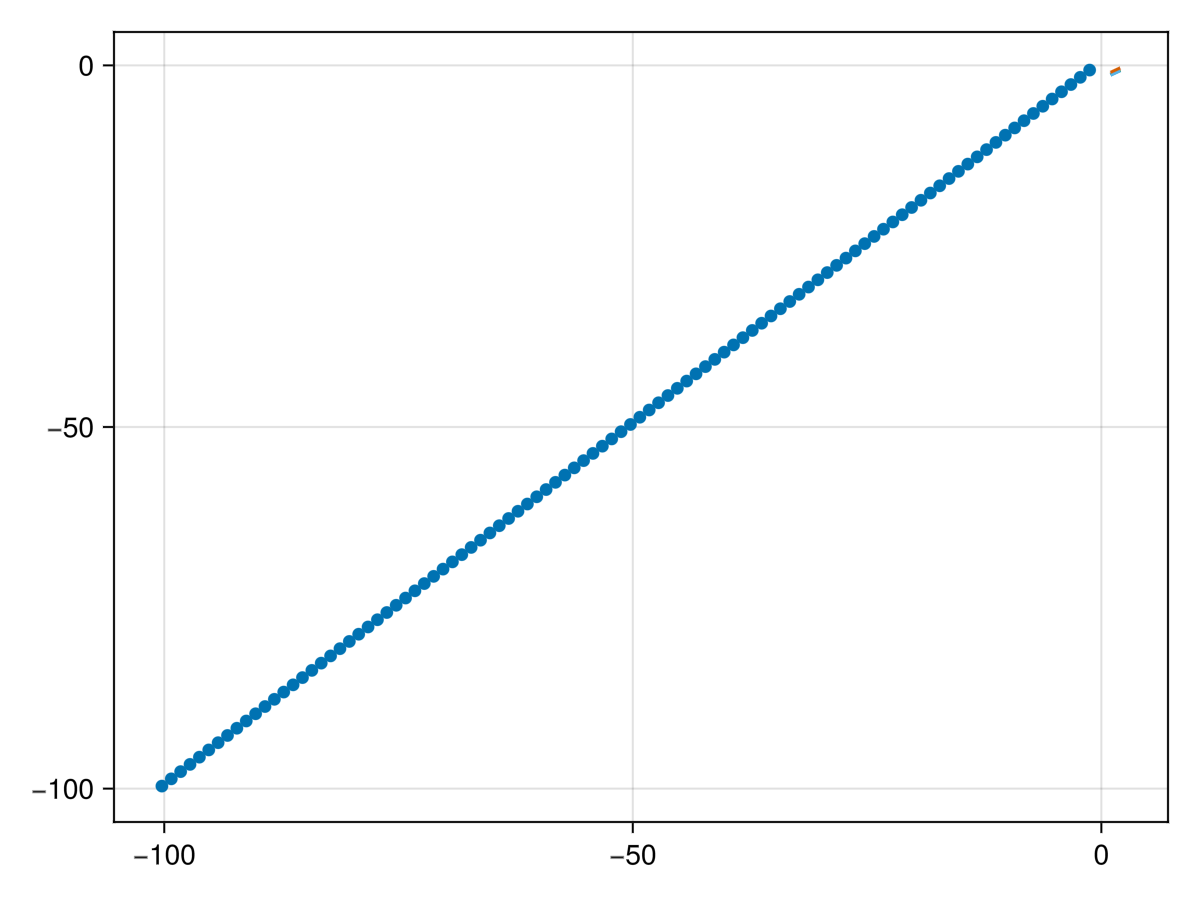

In [466]:
# recauculating the eingens with a different lambda values.
lines!(population_model(A, .95))
lines!(population_model(A, .85))
# recauculating the eingens with a different predention values.
lines!(population_model(calc_eingen_vectors(0.16), 1.0))
lines!(population_model(calc_eingen_vectors(0.16), 0.8))
lines!(population_model(calc_eingen_vectors(0.10), 1.1))
lines!(population_model(calc_eingen_vectors(0.10), 0.7))
current_figure()

In [490]:
data = gen_population_data(1:100, 0.1001, .1)

100-element Vector{Vector{Float64}}:
 [-0.35, 0.24999999999999997]
 [-0.35, 0.24999999999999997]
 [-0.35, 0.24999999999999997]
 [-0.35, 0.24999999999999997]
 [-0.35, 0.24999999999999997]
 [-0.35, 0.24999999999999997]
 [-0.35, 0.24999999999999997]
 [-0.35, 0.24999999999999997]
 [-0.35, 0.24999999999999997]
 [-0.35, 0.24999999999999997]
 ⋮
 [-0.35, 0.24999999999999997]
 [-0.35, 0.24999999999999997]
 [-0.35, 0.24999999999999997]
 [-0.35, 0.24999999999999997]
 [-0.35, 0.24999999999999997]
 [-0.35, 0.24999999999999997]
 [-0.35, 0.24999999999999997]
 [-0.35, 0.24999999999999997]
 [-0.35, 0.24999999999999997]

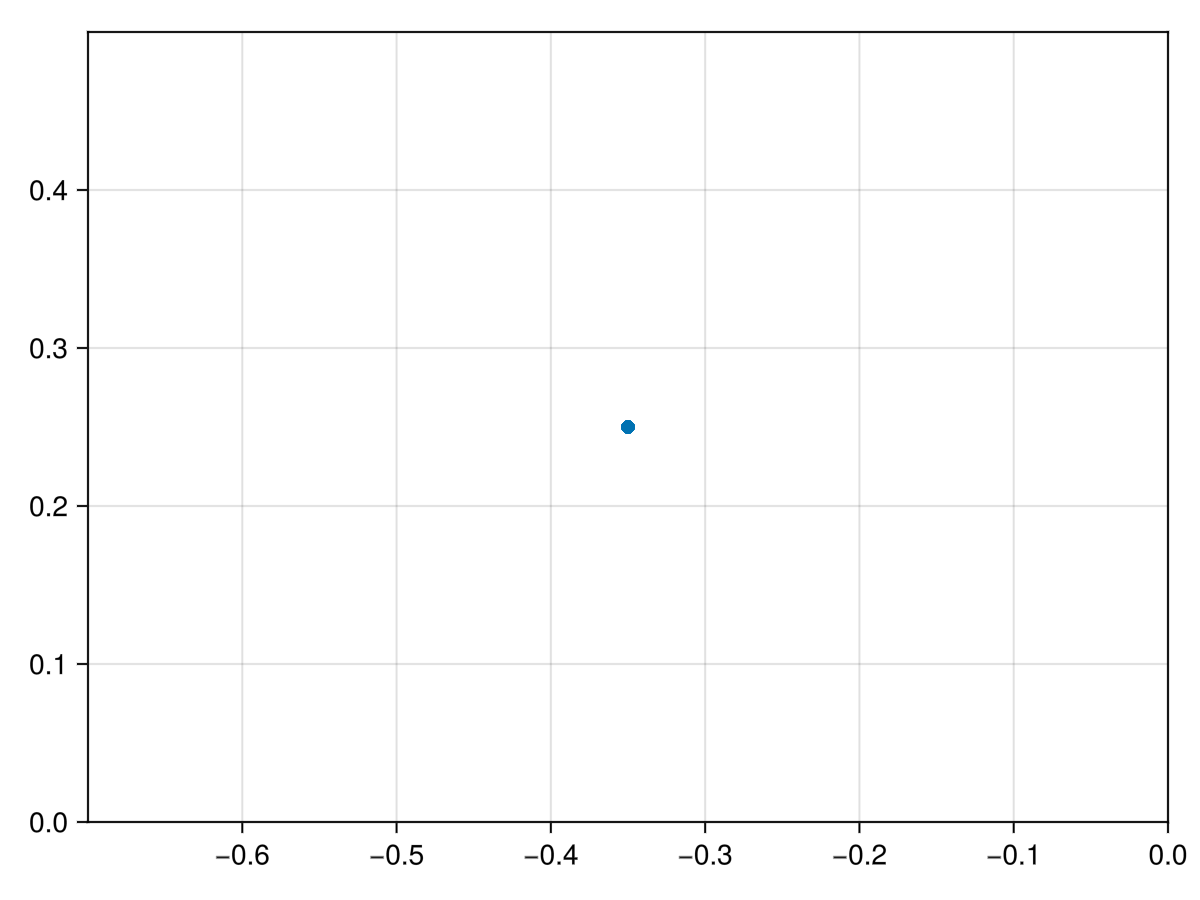

In [487]:
scatter(map(x -> x[1], data), map(x -> x[2], data))

In [469]:
RRf[a[:1, :1] - 1.1; a[:2, :2] - 1.1]

[  -1.350000000000000088817841970012523233890533447265625]
[-0.75000000000000011102230246251565404236316680908203125]

In [470]:
RRf[a[:1, :1] - 0.7; a[:2, :2] - 0.7]

[ -0.9499999999999999555910790149937383830547332763671875]
[-0.34999999999999997779553950749686919152736663818359375]

In [471]:
a[:, :1] .\ a[:, :2]

2-element Vector{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{AbstractAlgebra.Generic.MPoly{BigFloat}}}}:
 -2.0
 -2.0

In [472]:
−p / (λ = .95)

-0.18421052631578946

In [473]:
-p / (λ = .85)

-0.20588235294117646